# Thompson Sampling

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [15]:
import random
N = 500 #10k users
d = 10 #10 ads
ads_selected = [] #ads list
#Step 1 of thompson algo
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
#looping the data
for n in range(0, N): #loopin g all users
    ad = 0 #ad index starts with 0
    max_random = 0 #we need that to get max_random at step 3
    for i in range(0, d): #looping ads column
        #Step 2 of thompson algo
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        #Step 3 of thompson algo
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    #Updating the remaining lists
    ads_selected.append(ad) #adding all ads
    reward = dataset.values[n, ad] #rewards are the value we got as 0 or 1
    #updating this list according to thompson algo
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    #updating the other list according to the thompson algo
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    #sum of all reward
    total_reward = total_reward + reward

In [12]:
print(total_reward)
print(ads_selected)
print(len(ads_selected))

2581
[1, 3, 7, 0, 2, 6, 5, 0, 0, 4, 7, 8, 2, 4, 9, 3, 1, 4, 0, 6, 8, 6, 7, 5, 2, 9, 3, 8, 0, 4, 4, 4, 4, 0, 1, 1, 4, 1, 9, 8, 2, 4, 3, 6, 4, 3, 4, 5, 9, 0, 4, 2, 7, 2, 7, 7, 5, 3, 5, 4, 4, 3, 0, 0, 0, 7, 7, 8, 1, 7, 0, 9, 3, 4, 4, 0, 6, 5, 6, 6, 8, 5, 6, 3, 4, 0, 4, 6, 1, 6, 7, 2, 7, 6, 8, 8, 8, 6, 9, 9, 7, 6, 5, 8, 4, 1, 8, 6, 0, 8, 8, 4, 2, 8, 4, 8, 1, 3, 8, 8, 7, 1, 1, 6, 2, 6, 1, 8, 6, 8, 8, 6, 1, 8, 8, 8, 2, 7, 5, 9, 4, 5, 6, 8, 8, 7, 8, 8, 7, 4, 7, 1, 8, 1, 8, 1, 1, 7, 6, 7, 8, 6, 8, 7, 1, 2, 8, 8, 1, 9, 1, 4, 7, 8, 1, 7, 8, 7, 4, 6, 6, 1, 1, 7, 1, 1, 8, 7, 7, 7, 0, 7, 7, 8, 7, 8, 7, 7, 2, 7, 1, 3, 8, 7, 4, 7, 1, 1, 6, 7, 8, 0, 8, 4, 7, 1, 7, 8, 6, 8, 1, 5, 9, 1, 5, 4, 1, 7, 8, 7, 8, 8, 8, 7, 1, 7, 8, 7, 3, 7, 1, 7, 3, 4, 0, 7, 7, 9, 7, 1, 7, 4, 7, 1, 8, 0, 6, 8, 7, 0, 0, 5, 7, 7, 7, 0, 7, 7, 8, 7, 7, 7, 1, 8, 9, 0, 1, 9, 7, 5, 0, 8, 7, 8, 0, 0, 3, 7, 0, 1, 6, 7, 8, 1, 7, 7, 8, 0, 0, 6, 3, 2, 6, 5, 0, 1, 4, 0, 1, 7, 8, 0, 0, 5, 0, 7, 0, 0, 0, 0, 8, 8, 0, 2, 0, 0, 7, 0, 0, 0, 0, 8

## Visualising the results - Histogram

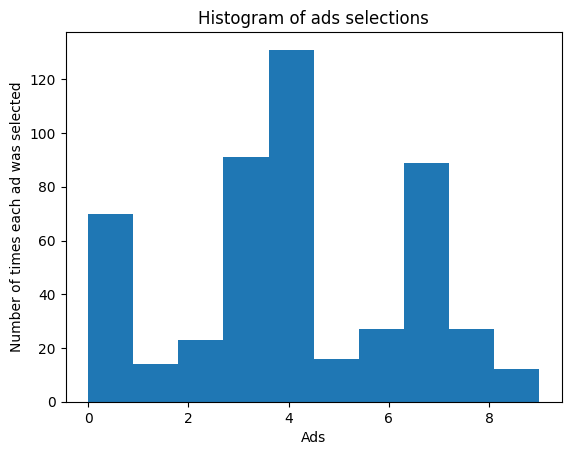

In [16]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Read the blog: [Blog](https://mitul-shahriyar.hashnode.dev/machine-learning-reinforcement-learning-solving-multi-armed-bandit-problem-with-thompson-sampling-part-23)